# ANALISI ESERCIZIO 10


In [2]:
import numpy as np                                                                 
import matplotlib.pyplot as plt    

## ESERCIZIO 10.1

In questo esercizio risolviamo il problema del "Travelling Salesman" implementando un algoritmo di Simulated Annealing. 

Ho scelto come temperatura iniziale2000 K e per ogni temperatura facevo un totale di 1000 mutazioni con una probabilità di accettazione pari a$$
p(x) = exp{-\left[(L^{1}_{new} - L^{1}_{old})/T\right]} 
$$ 

Dopo di che la temperatura calava di un fattore 10 e l'algoritmo ricominciava. 

Anche in questo caso ho implementato un algoritmo di convergenza per capire quando stoppare la simulazione.

## CIRCLE 32 CITIES

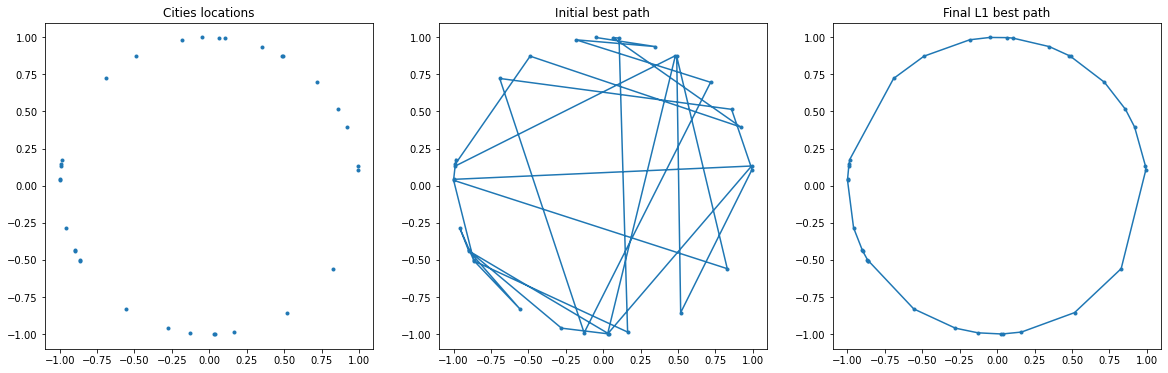

In [12]:
x=np.loadtxt("Esercizio10_1/outputs/city_circle.dat")                            
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations");

initial=np.loadtxt("Esercizio10_1/outputs/circle_initial_best_path.dat",dtype="uint32")  
x_initial=x[initial,0]
y_initial=x[initial,1]
ax[1].plot(x_initial, y_initial, marker="."); 
ax[1].set_title("Initial best path");

final=np.loadtxt("Esercizio10_1/outputs/circle_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[2].plot(x_final, y_final, marker=".");  
ax[2].set_title("Final L1 best path");

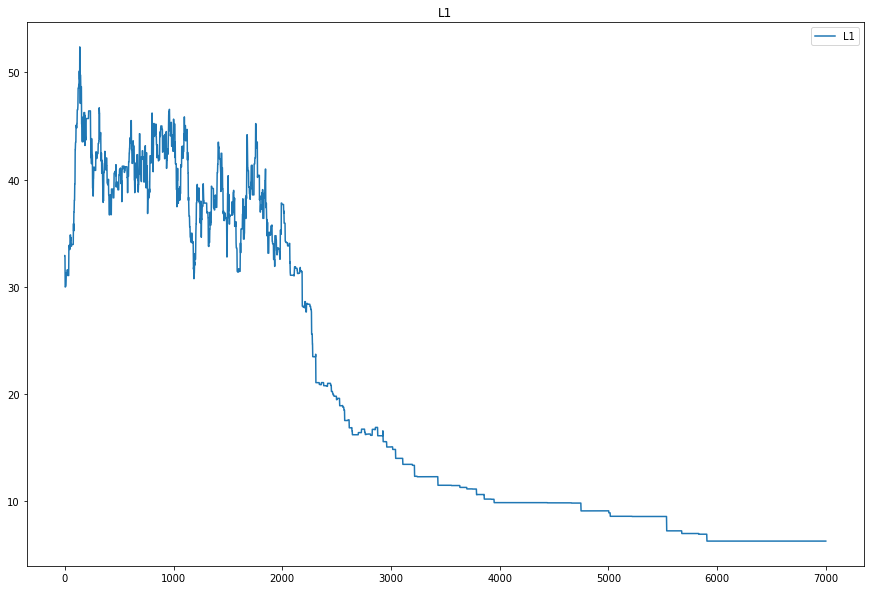

In [13]:
av=np.loadtxt("Esercizio10_1/outputs/circle_step.dat") 
plt.figure(figsize=(15,10));

plt.plot(av, label="L1")
plt.title("L1")
plt.legend()

## SQUARE 32 CITIES

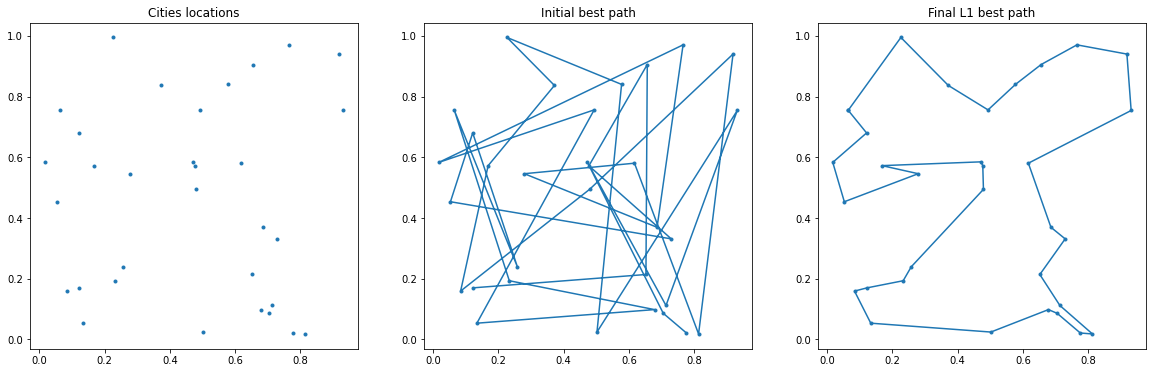

In [14]:
x=np.loadtxt("Esercizio10_1/outputs/city_square.dat")                            
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations");

initial=np.loadtxt("Esercizio10_1/outputs/square_initial_best_path.dat",dtype="uint32")  
x_initial=x[initial,0]
y_initial=x[initial,1]
ax[1].plot(x_initial, y_initial, marker="."); 
ax[1].set_title("Initial best path");

final=np.loadtxt("Esercizio10_1/outputs/square_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[2].plot(x_final, y_final, marker=".");  
ax[2].set_title("Final L1 best path");

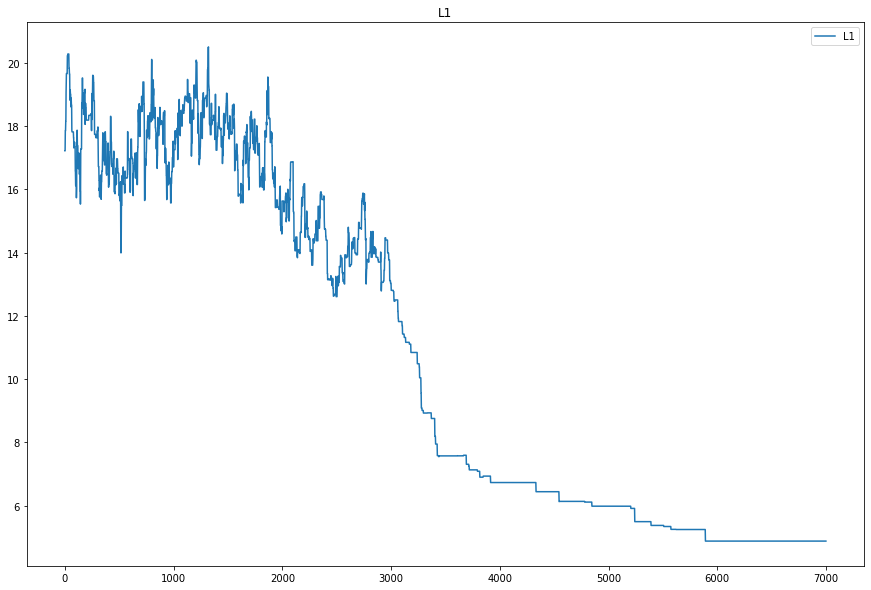

In [15]:
best=np.loadtxt("Esercizio10_1/outputs/square_step.dat")

plt.figure(figsize=(15,10));

plt.plot(best,label="L1")
plt.title("L1")
plt.legend()


Per entrambi i grafici di L1 in funzione del numero di step notiamo come il valore della funzione di costo ha grandi oscillazioni durante i primi passi, quindi a temperature alte. Invece a temperature più basse il valore di L1 tende a miglioare più velocemente.

### Confronto con algoritmo genetico

Confrontando i due algoritmi ho notato come entrambi riesco ad arrivare ad una buona convergenza. La grande differenza si nota nei tempi computazionali, il simulated annealing impiegava molto di meno a convergere rispetto all'algoritmo genetico. Questo può anche essere causato dalla necessità di gestire meno dati, infatti nel simulated annealing abbiamo un singolo individuo su cui vengono effetuate le mutazioni; invece per l'algoritmo genetico dobbiamo gestire una popolazione con più individui.

## ESERCIZIO 10.2

In questo esercizio ho utilizzato la libreria MPI per paralizzare il codice di algoritmo genetico dell'esercizio 9. Ho utilizzato un totale di 4 core e quindi 4 isole che si scambiavano informazioni ogni 20 generazioni.

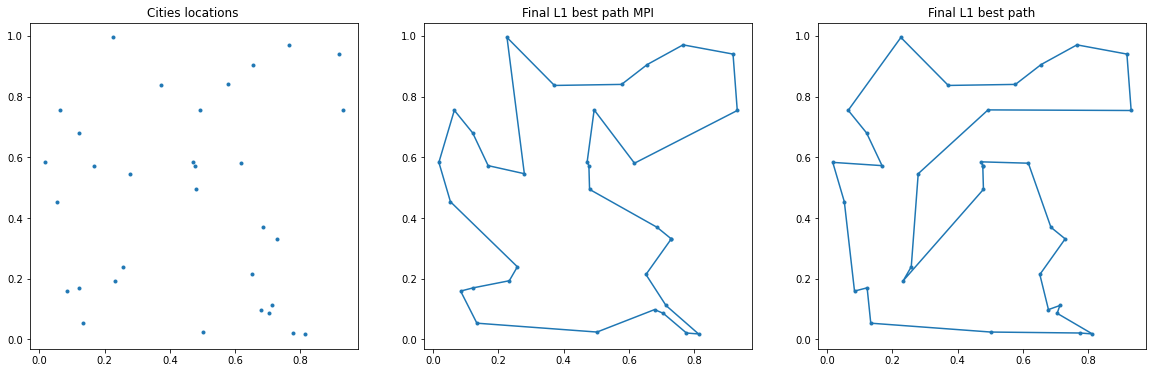

In [44]:
x=np.loadtxt("Esercizio10_2/outputs/city_square.dat")
y=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/city_square.dat")
fig,ax = plt.subplots(1,3, figsize=(20, 6))

ax[0].plot(x[:,0], x[:,1], marker=".", linestyle="");
ax[0].set_title("Cities locations ");

final=np.loadtxt("Esercizio10_2/outputs/square_new_best_path.dat",dtype="uint32")  
x_final=x[final,0]
x_final=np.append(x_final, x[final[0],0])
y_final=x[final,1]
y_final=np.append(y_final, x[final[0],1])
ax[1].plot(x_final, y_final, marker=".");  
ax[1].set_title("Final L1 best path MPI");

final1=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/square_new_best_path.dat",dtype="uint32")  
x_final1=y[final1,0]
x_final1=np.append(x_final1, y[final1[0],0])
y_final1=y[final1,1]
y_final1=np.append(y_final1, y[final1[0],1])
ax[2].plot(x_final1, y_final1, marker=".");  
ax[2].set_title("Final L1 best path");



In [45]:
best_mpi=np.loadtxt("Esercizio10_2/outputs/square_step.dat")
best_normal=np.loadtxt("../Esercizio_9/Esercizio9_1/outputs/best_square.dat")
print("L1 finale quadrato MPI:",best_mpi[len(best_mpi)-1])
print("L1 finale quadrato:",best_normal[len(best_normal)-1])

L1 finale quadrato MPI: 4.81063
L1 finale quadrato: 5.36836


Per uno stesso numero di generazioni, in questo caso 100, l'utilizzo delle isole ha migliorato sensibilmente il risultato della simulazione.